In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
df = pd.read_csv(r'C:\Users\Rich\Downloads\sentiment-analysis.csv')


In [7]:
df.head()


,"Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score"
0,"""I love this product!"", Positive, Twitter, 202..."
1,"""The service was terrible."", Negative, Yelp Re..."
2,"""This movie is amazing!"", Positive, IMDb, 2023..."
3,"""I'm so disappointed with their customer suppo..."
4,"""Just had the best meal of my life!"", Positive..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 1 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score  96 non-null     object
dtypes: object(1)
memory usage: 912.0+ bytes


In [10]:
df.isna().sum()

Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score    2
dtype: int64

In [11]:
df=df.dropna()


In [12]:
len(df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'][0].split(','))

7

In [13]:
df['Text']=df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].apply(lambda x: x.split(',')[0])
df['Sentiment']=df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].apply(lambda x: x.split(',')[1])
df['Source']=df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].apply(lambda x: x.split(',')[2])
df['Date/Time']=df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].apply(lambda x: x.split(',')[3])
df['User ID']=df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].apply(lambda x: x.split(',')[4])
df['Location']=df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].apply(lambda x: x.split(',')[5])
df['Confidence Score']=df['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].apply(lambda x: x.split(',')[6])

In [14]:
df=df.drop(df.iloc[:,0:1], axis=1)

In [15]:
df.head()

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
0,"""I love this product!""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,"""The service was terrible.""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,"""This movie is amazing!""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,"""Just had the best meal of my life!""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88


In [16]:
import seaborn as sns

In [18]:
k=df['Sentiment'].value_counts()

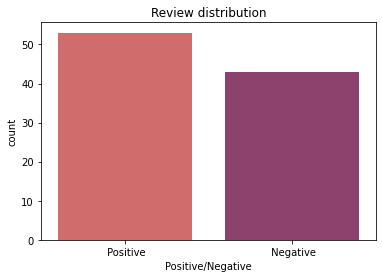

In [19]:
plt.title("Review distribution")
plt.xlabel("Positive/Negative")
plt.ylabel("count")
sns.barplot(x=k.index,y=k.values,palette="flare")
plt.show()


In [20]:
df['Source'].value_counts()

 Online Store           11
 Spotify                 9
 Zomato                  7
 Website Review          7
 IMDb                    6
 TripAdvisor             6
 Goodreads               6
 Yelp Reviews            6
 Website Testimonial     4
 Online Chat             4
 Event Review            3
 Theme Park Review       3
 Music Review            3
 Hotel Review            2
 Online Helpdesk         2
 Retail Store            2
 Twitter                 2
 Trip Report             2
 Amazon Reviews          2
 Online Forum            2
 Airline Review          1
 Gaming Forum            1
 Travel Website          1
 Food Blog               1
 TV Show Review          1
 Art Review              1
 Travel Blog             1
Name: Source, dtype: int64

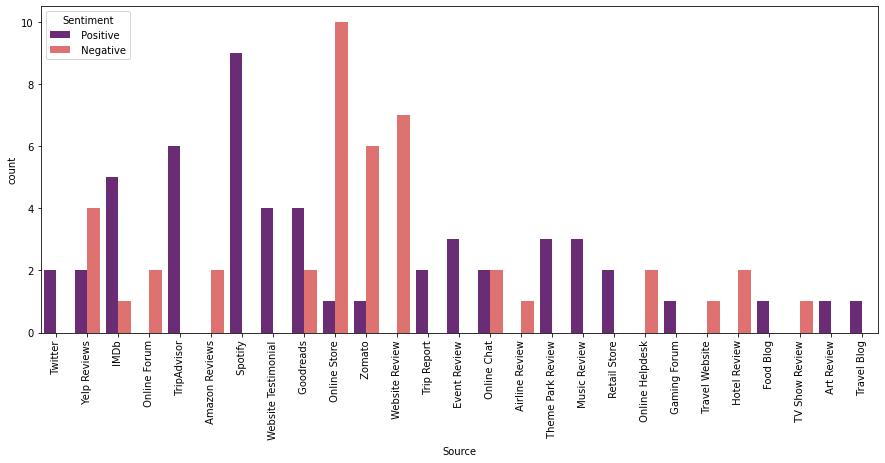

In [21]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='Source',hue="Sentiment",data=df,palette='magma')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

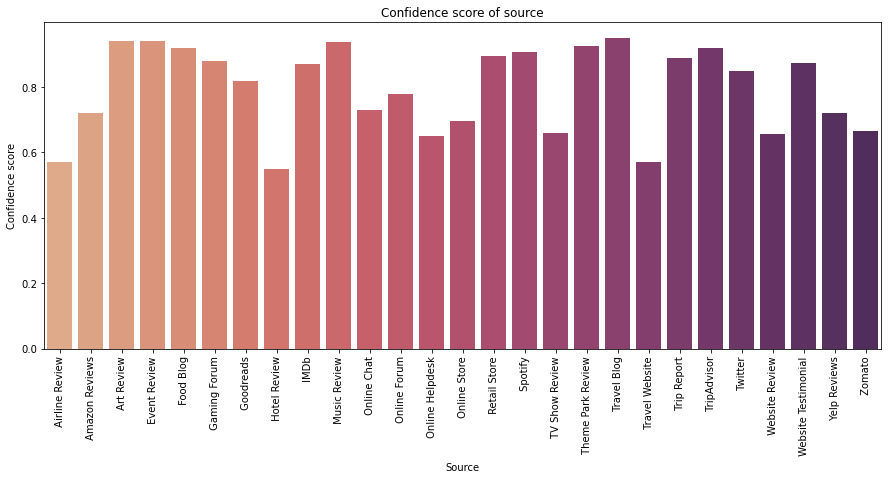

In [22]:
df['Confidence Score']=pd.to_numeric(df['Confidence Score'],errors='coerce')
j=df.groupby("Source")['Confidence Score'].mean()
plt.figure(figsize=(15,6))
plt.title("Confidence score of source")
plt.xlabel("Source")
plt.ylabel("Confidence score")
ax=sns.barplot(x=j.index,y=j.values,palette="flare")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

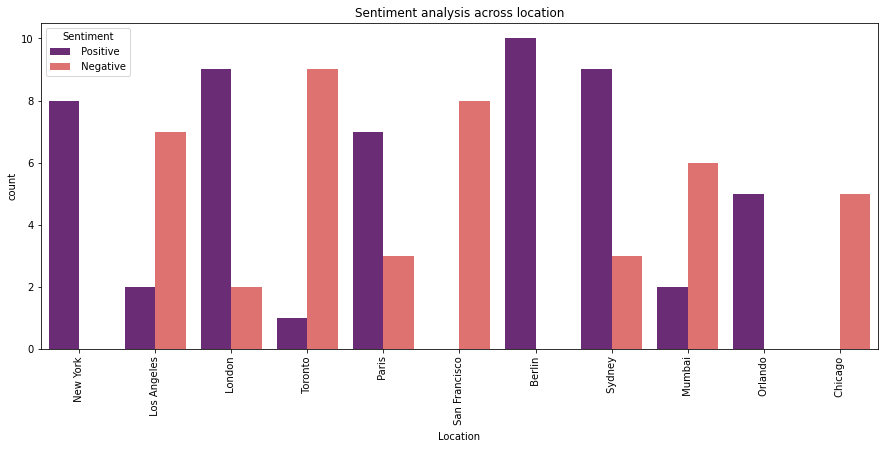

In [23]:
plt.figure(figsize=(15,6))
plt.title("Sentiment analysis across location")
ax=sns.countplot(data=df,x="Location",hue="Sentiment",palette="magma")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

<AxesSubplot:ylabel='Sentiment'>

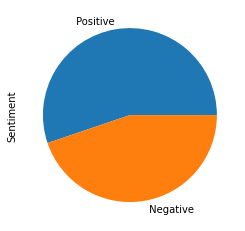

In [25]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='pie')

<AxesSubplot:title={'center':'review sources'}>

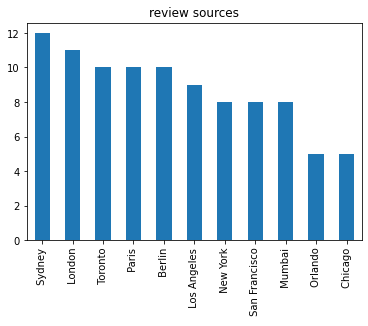

In [27]:
df['Location'].value_counts().plot(kind='bar',title = 'review sources')

In [28]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rich\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rich\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [30]:
sentences = df["Text"].values.tolist()
print(sentences[0:2])

['"I love this product!"', '"The service was terrible."']


In [31]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    lowercase_tokens = [token.lower() for token in tokens]
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [token for token in lowercase_tokens if token not in string.punctuation and token not in stop_words]
    return cleaned_tokens

# Apply preprocessing to each sentence
preprocessed_sentences = [preprocess_text(sentence) for sentence in sentences]
print(preprocessed_sentences[0:2])

[['``', 'love', 'product', "''"], ['``', 'service', 'terrible', "''"]]


In [32]:
#saving some instances of preprocessed_sentences into sample_sentences to get clear vision on the outputs.
sample_sentences=preprocessed_sentences[0:6]
# Convert preprocessed sentences to text
preprocessed_text = [' '.join(tokens) for tokens in sample_sentences]
#print("Preprocessed text:",preprocessed_text) 
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(preprocessed_text)
feature_names = vectorizer.get_feature_names_out()
# Convert the sparse matrix to a dense array
X_array = X.toarray()

# Print the feature names and the BoW matrix
print("The output is only on sentences 1 to 6")
print("\nFeature Names:", feature_names)
print("\nBoW Matrix:")
print(X_array)

The output is only on sentences 1 to 6

Feature Names: ['amazing' 'best' 'customer' 'disappointed' 'life' 'love' 'meal' 'movie'
 'product' 'quality' 'service' 'subpar' 'support' 'terrible']

BoW Matrix:
[[0 0 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 1 0 0]]


In [33]:
# Calculate word frequency from the BoW matrix
word_frequency = X_array.sum(axis=0)

# Create a dictionary with word frequencies
word_frequency_dict = dict(zip(feature_names, word_frequency))

# Print the word frequencies
print("The output is only on sentences 1 to 6")
for word, frequency in word_frequency_dict.items():
    print(f"{word}: {frequency}")

The output is only on sentences 1 to 6
amazing: 1
best: 1
customer: 1
disappointed: 1
life: 1
love: 1
meal: 1
movie: 1
product: 2
quality: 1
service: 1
subpar: 1
support: 1
terrible: 1
